In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
import math as math
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import torch.nn as nn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import torch
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

In [28]:
train = pd.read_csv('Preprocess_Train.csv')
val = pd.read_csv('Preprocess_Val.csv')
test = pd.read_csv('Preprocess_Test.csv')


b_train = pd.read_csv("train.csv")
b_val = pd.read_csv("val.csv")
b_test = pd.read_csv("test.csv")
b_train['sentiment'] = b_train['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
b_val['sentiment'] = b_val['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
b_test['sentiment'] = b_test['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
b_train.dropna( inplace=True)



In [29]:
X_train,y_train= train.iloc[:,6:8], train.iloc[:,8]
X_test,y_test= test.iloc[:,6:8], test.iloc[:,8]
X_val,y_val= val.iloc[:,6:8], val.iloc[:,8]

b_X_train,b_y_train= b_train.iloc[:,6:8], b_train.iloc[:,8]
b_X_test,b_y_test= b_test.iloc[:,6:8], b_test.iloc[:,8]
b_X_val,b_y_val= b_val.iloc[:,6:8], b_val.iloc[:,8]


for original data
rmse on validation data for degree 2 is: 0.4200692387645237
mse on validation data for degree 2is:0.1764581653562064
r-squared error on validation data for degree 2is:0.5037734382558876
regression Surface for degree 2


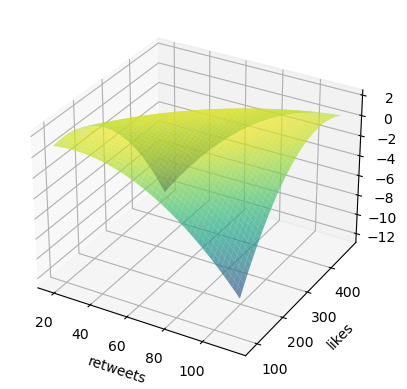

for original data
rmse on validation data for degree 3 is: 0.4215425166258614
mse on validation data for degree 3is:0.17769809332326464
r-squared error on validation data for degree 3is:0.5002865767062299
regression Surface for degree 3


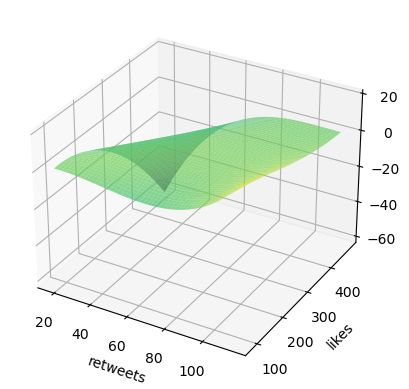

for original data
rmse on validation data for degree 4 is: 0.3326937412036252
mse on validation data for degree 4is:0.11068512543606475
r-squared error on validation data for degree 4is:0.6887369925869945
regression Surface for degree 4


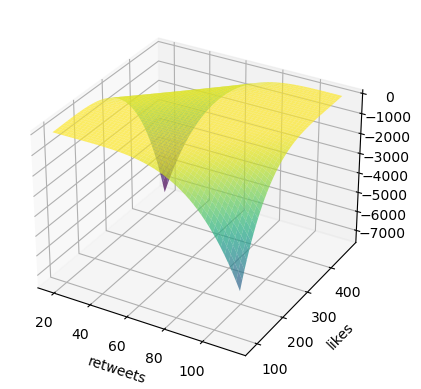

for original data
rmse on validation data for degree 5 is: 0.18227662509532996
mse on validation data for degree 5is:0.033224768056143474
r-squared error on validation data for degree 5is:0.9065670189647259
regression Surface for degree 5


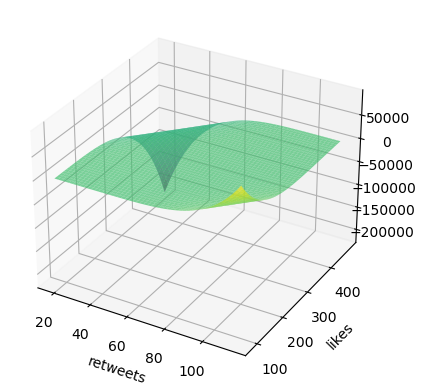

for original data
rmse on validation data for degree 6 is: 0.18143696040129828
mse on validation data for degree 6is:0.03291937059966228
r-squared error on validation data for degree 6is:0.9074258419582051
regression Surface for degree 6


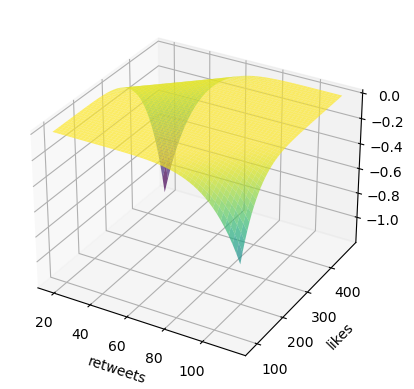

for original data
rmse on validation data for degree 7 is: 0.17960709203835432
mse on validation data for degree 7is:0.032258707510473876
r-squared error on validation data for degree 7is:0.9092837246612095
regression Surface for degree 7


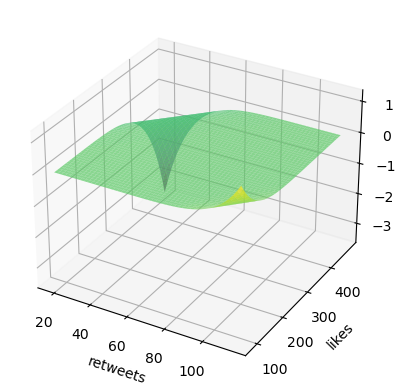

best degree for polynomial prediction is:7,min rmse is:0.17960709203835432, mse is:0.032258707510473876,r-squared:0.9092837246612095


In [30]:
degrees = [2,3,4,5,6,7]
b_min_val_rmse = 10000
feature1 = 'retweets'
feature2 = 'likes'
rmse_val_list = []
min_mse = []
r_min = []
for d in degrees:
    print("for original data")
    transformer = PolynomialFeatures(degree=d)
    X_train_transf = transformer.fit_transform(b_X_train)
    X_val_transf = transformer.fit_transform(b_X_val)
    regressor = LinearRegression()
    regressor.fit(X_train_transf, b_y_train)

    y_val_pred_poly = regressor.predict(X_val_transf)
    rmse_val = np.sqrt(mean_squared_error(y_val_pred_poly, b_y_val))
    rmse_val_list.append(rmse_val)
    mse_val = mean_squared_error(b_y_val, y_val_pred_poly)
    r_val = r2_score(b_y_val, y_val_pred_poly)
    
    if(rmse_val<b_min_val_rmse):
        min_val_rmse = rmse_val
        min_ErrorTransformer = transformer
        min_ErrorRegressor = regressor
        b_best_degree = d
        min_mse = mse_val
        r_min = r_val
    print(f"rmse on validation data for degree {d} is: {rmse_val:}")
    print(f"mse on validation data for degree {d}is:{mse_val}")
    print(f"r-squared error on validation data for degree {d}is:{r_val}")
    
    print(f'regression Surface for degree {d}')
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    x_range = np.linspace(b_X_val[feature1].min(),b_X_val[feature1].max(),50) 
    y_range = np.linspace(b_X_val[feature2].min(),b_X_val[feature2].max(),50)
    X_grid,Y_grid = np.meshgrid(x_range,y_range)

    grid_points = np.c_[X_grid.ravel(),Y_grid.ravel()]
    grid_points_df = pd.DataFrame(grid_points,columns=[feature1,feature2])
    grid_points_df_transf = transformer.transform(grid_points_df)

    Z_grid = regressor.predict(grid_points_df_transf)
    Z_grid = Z_grid.reshape(X_grid.shape)

    ax.plot_surface(X_grid,Y_grid,Z_grid,cmap='viridis', alpha=0.7, edgecolor='none')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    plt.show()
    
print(f"best degree for polynomial prediction is:{b_best_degree},min rmse is:{min_val_rmse}, mse is:{mse_val},r-squared:{r_min}")

for original data
rmse on test data for degree 7 is: 0.17960709203835432
mse on test data for degree 7 is: 0.032258707510473876
r-squared error on test data for degree 7 is: 0.9092837246612095
regression Surface for degree 7


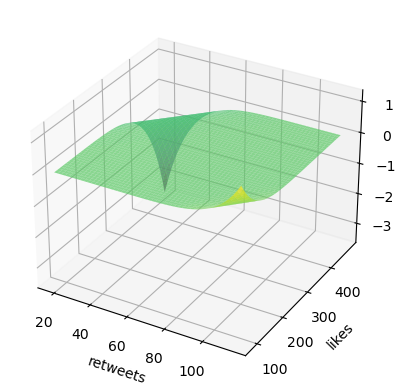

In [31]:
X_train_transf = min_ErrorTransformer.fit_transform(b_X_train)
X_test_transf = min_ErrorTransformer.fit_transform(b_X_test)
min_ErrorRegressor.fit(X_train_transf, b_y_train)
y_test_pred_poly = min_ErrorRegressor.predict(X_test_transf)
rmse_test = np.sqrt(mean_squared_error(y_test_pred_poly, b_y_test))
mse_test = mean_squared_error(b_y_test, y_test_pred_poly)
r_test = r2_score(b_y_test, y_test_pred_poly)
print("for original data")
print(f"rmse on test data for degree {b_best_degree} is: {rmse_test:}")
print(f"mse on test data for degree {b_best_degree} is: {mse_test:}")
print(f"r-squared error on test data for degree {b_best_degree} is: {r_test:}")

print(f'regression Surface for degree {b_best_degree}')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x_range = np.linspace(b_X_test[feature1].min(),b_X_test[feature1].max(),50) 
y_range = np.linspace(b_X_test[feature2].min(),b_X_test[feature2].max(),50)
X_grid,Y_grid = np.meshgrid(x_range,y_range)

grid_points = np.c_[X_grid.ravel(),Y_grid.ravel()]
grid_points_df = pd.DataFrame(grid_points,columns=[feature1,feature2])
grid_points_df_transf = min_ErrorTransformer.transform(grid_points_df)

Z_grid = min_ErrorRegressor.predict(grid_points_df_transf)
Z_grid = Z_grid.reshape(X_grid.shape)

ax.plot_surface(X_grid,Y_grid,Z_grid,cmap='viridis', alpha=0.7, edgecolor='none')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

For Normalized data:
rmse on validation data for degree 2 is: 0.47148340146544804
mse on validation data for degree 2 is: 0.22229659785742883
r-squared error on validation data for degree 2 is: 0.3748689599059932
regression Surface for degree 2


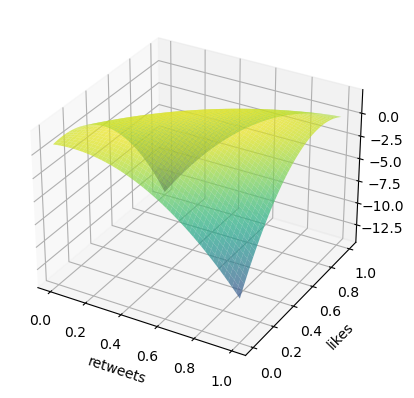

For Normalized data:
rmse on validation data for degree 3 is: 0.4511517731481735
mse on validation data for degree 3 is: 0.203537922414741
r-squared error on validation data for degree 3 is: 0.4276211405659702
regression Surface for degree 3


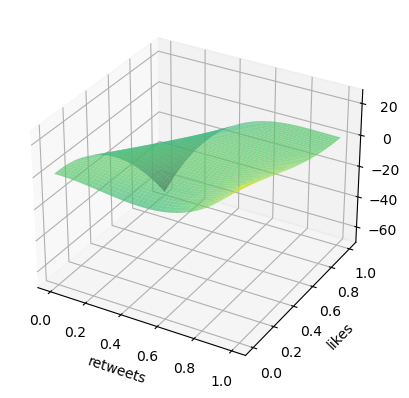

For Normalized data:
rmse on validation data for degree 4 is: 0.3475228143960354
mse on validation data for degree 4 is: 0.12077210652574126
r-squared error on validation data for degree 4 is: 0.6603709040333485
regression Surface for degree 4


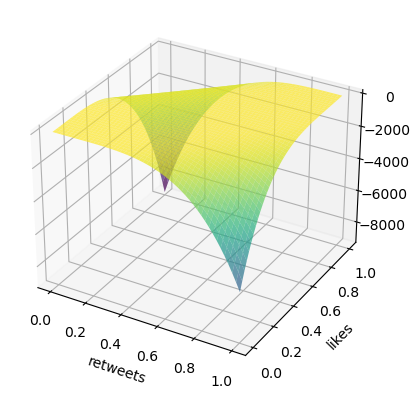

For Normalized data:
rmse on validation data for degree 5 is: 0.4797513779362834
mse on validation data for degree 5 is: 0.23016138463176264
r-squared error on validation data for degree 5 is: 0.35275201172170234
regression Surface for degree 5


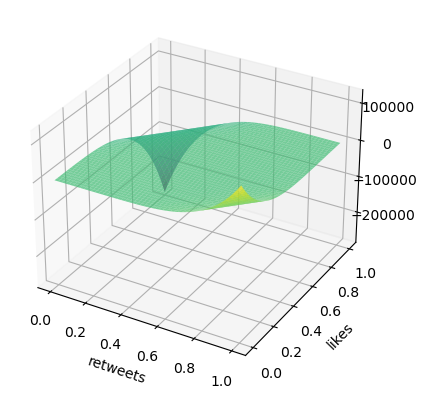

For Normalized data:
rmse on validation data for degree 6 is: 0.6391176978711963
mse on validation data for degree 6 is: 0.40847143173217776
r-squared error on validation data for degree 6 is: -0.14868231645719265
regression Surface for degree 6


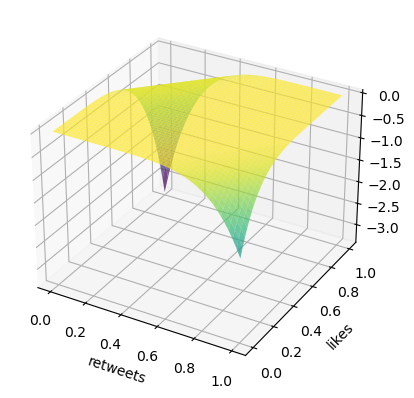

For Normalized data:
rmse on validation data for degree 7 is: 2.489594890987963
mse on validation data for degree 7 is: 6.198082721233368
r-squared error on validation data for degree 7 is: -16.429928912354804
regression Surface for degree 7


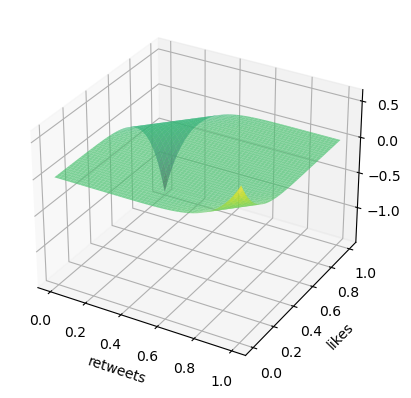

For Normalized data:
rmse on validation data for degree 8 is: 6.446166572140968
mse on validation data for degree 8 is: 41.55306347578764
r-squared error on validation data for degree 8 is: -115.85338435260866
regression Surface for degree 8


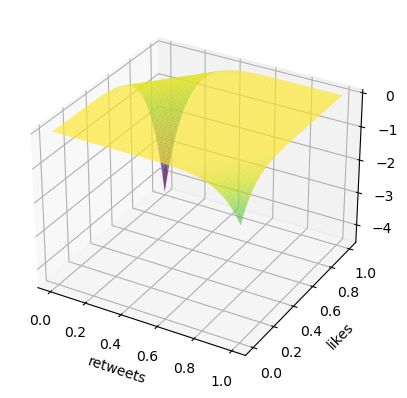

best degree for polynomial prediction is:4,rmse:0.3475228143960354,mse:0.12077210652574126,r-squared error is :0.6603709040333485


In [32]:
degrees = [2,3,4,5,6,7,8]
min_val_rmse = 10000
feature1 = 'retweets'
feature2 = 'likes'
rmse_val_list = []
rmse_val_list = []
r_min = 1000
for d in degrees:
    print("For Normalized data:")
    transformer = PolynomialFeatures(degree=d)
    X_train_transf = transformer.fit_transform(X_train)
    X_val_transf = transformer.fit_transform(X_val)
    regressor = LinearRegression()
    regressor.fit(X_train_transf, y_train)

    y_val_pred_poly = regressor.predict(X_val_transf)
    rmse_val = np.sqrt(mean_squared_error(y_val_pred_poly, y_val))
    rmse_val_list.append(rmse_val)
    mse_val = mean_squared_error(y_val, y_val_pred_poly)
    r_val = r2_score(y_val, y_val_pred_poly)
    if(rmse_val<min_val_rmse):
        min_val_rmse = rmse_val
        min_ErrorTransformer = transformer
        min_ErrorRegressor = regressor
        best_degree = d
        min_val_mse=mse_val
        r_min = r_val
    print(f"rmse on validation data for degree {d} is: {rmse_val:}")   
    print(f"mse on validation data for degree {d} is: {mse_val:}")   
    print(f"r-squared error on validation data for degree {d} is: {r_val:}")
    print(f'regression Surface for degree {d}')
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    x_range = np.linspace(X_val[feature1].min(),X_val[feature1].max(),50) 
    y_range = np.linspace(X_val[feature2].min(),X_val[feature2].max(),50)
    X_grid,Y_grid = np.meshgrid(x_range,y_range)

    grid_points = np.c_[X_grid.ravel(),Y_grid.ravel()]
    grid_points_df = pd.DataFrame(grid_points,columns=[feature1,feature2])
    grid_points_df_transf = transformer.transform(grid_points_df)

    Z_grid = regressor.predict(grid_points_df_transf)
    Z_grid = Z_grid.reshape(X_grid.shape)

    ax.plot_surface(X_grid,Y_grid,Z_grid,cmap='viridis', alpha=0.7, edgecolor='none')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    plt.show()
print(f"best degree for polynomial prediction is:{best_degree},rmse:{min_val_rmse},mse:{min_val_mse},r-squared error is :{r_min}")

for normalized  data
rmse on test data for degree 4 is: 0.3475228143960354
mse on test data for degree4 is:0.12077210652574126
r-squared error on test data for degree4 is:0.6603709040333485
regression Surface for degree 4


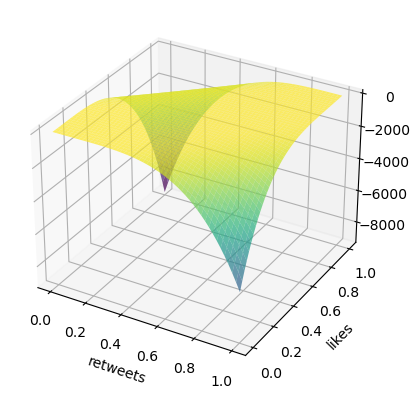

In [33]:
X_train_transf = min_ErrorTransformer.fit_transform(X_train)
X_test_transf = min_ErrorTransformer.fit_transform(X_test)
min_ErrorRegressor.fit(X_train_transf, y_train)
y_test_pred_poly = min_ErrorRegressor.predict(X_test_transf)
rmse_test = np.sqrt(mean_squared_error(y_test_pred_poly, y_test))
mse_test = mean_squared_error(y_test, y_test_pred_poly)
mse_test = mean_squared_error(y_test, y_test_pred_poly)
r_test = r2_score(y_test, y_test_pred_poly)

print("for normalized  data")
print(f"rmse on test data for degree {best_degree} is: {rmse_test:}")
print(f"mse on test data for degree{best_degree} is:{mse_test}")
print(f"r-squared error on test data for degree{best_degree} is:{r_test}")
print(f'regression Surface for degree {best_degree}')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x_range = np.linspace(X_test[feature1].min(),X_test[feature1].max(),50) 
y_range = np.linspace(X_test[feature2].min(),X_test[feature2].max(),50)
X_grid,Y_grid = np.meshgrid(x_range,y_range)

grid_points = np.c_[X_grid.ravel(),Y_grid.ravel()]
grid_points_df = pd.DataFrame(grid_points,columns=[feature1,feature2])
grid_points_df_transf = min_ErrorTransformer.transform(grid_points_df)

Z_grid = min_ErrorRegressor.predict(grid_points_df_transf)
Z_grid = Z_grid.reshape(X_grid.shape)

ax.plot_surface(X_grid,Y_grid,Z_grid,cmap='viridis', alpha=0.7, edgecolor='none')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

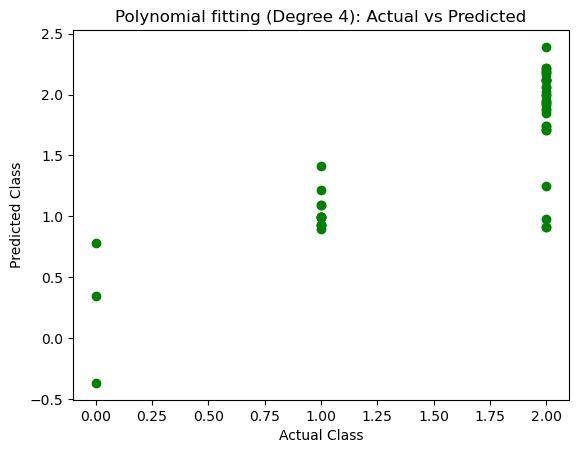

In [34]:
plt.scatter(y_test, y_test_pred_poly, color="green")
plt.xlabel("Actual Class"), plt.ylabel("Predicted Class"), plt.title(f"Polynomial fitting (Degree {best_degree}): Actual vs Predicted")
plt.show()

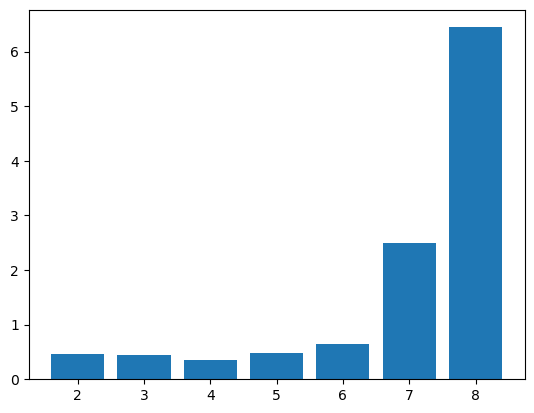

In [35]:
plt.bar(degrees,rmse_val_list)
plt.show()

In [36]:
nltk.download('punkt_tab')

# Load the dataset
NLP_train = pd.read_csv("train.csv")
NLP_val = pd.read_csv("val.csv")
NLP_test = pd.read_csv("test.csv")
df = pd.concat([NLP_train, NLP_val, NLP_test], ignore_index=True)

df['sentiment'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

df.dropna( inplace=True)

a_NLP_train = pd.read_csv("Preprocess_Train.csv")
a_NLP_val = pd.read_csv("Preprocess_Val.csv")
a_NLP_test = pd.read_csv("Preprocess_Test.csv")
a_df = pd.concat([a_NLP_train, a_NLP_val, a_NLP_test], ignore_index=True)
# Function to clean tweets
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

# Apply cleaning function
df['clean_tweet'] = df['tweet_text'].apply(clean_text)
a_df['clean_tweet'] = a_df['tweet_text'].apply(clean_text)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( max_features=5000)  # Use top 5000 words
X_text = vectorizer.fit_transform(df['clean_tweet']).toarray()
a_X_text = vectorizer.fit_transform(a_df['clean_tweet']).toarray()

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get numerical features (likes, retweets)
X_numerical = df[['likes', 'retweets']].values
a_X_numerical = a_df[['likes', 'retweets']].values

# Combine numerical and text features
X = np.hstack((X_numerical, X_text))
a_X = np.hstack((a_X_numerical, a_X_text))

# Get sentiment scores as target variable

y = df['sentiment'].values
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.0834724540901, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.0910746812386, random_state=42)


a_y = a_df['sentiment'].values
a_X_temp, a_X_test, a_y_temp, a_y_test = train_test_split(a_X, a_y, test_size=0.0834724540901, random_state=42)
a_X_train, a_X_val, a_y_train, a_y_val = train_test_split(a_X_temp, a_y_temp, test_size=0.0910746812386, random_state=42)
# Train Linear Regression Model
NLP_degrees = [1,2]
NLP_min_val_rmse = 10000
a_NLP_min_val_rmse = 10000
a_NLP_min_mse = 100000
NLP_min_mse = 10000
r_min = 10000
NLP_rmse_val_list = []
NLP_rmse_val_list = []
for d in NLP_degrees:
    print("for original data")
    NLP_transformer = PolynomialFeatures(degree=d)
    NLP_X_train_transf = NLP_transformer.fit_transform(X_train)
    NLP_X_val_transf = NLP_transformer.fit_transform(X_val)
    NLP_regressor = LinearRegression()
    NLP_regressor.fit(NLP_X_train_transf, y_train)

    NLP_y_val_pred_poly = NLP_regressor.predict(NLP_X_val_transf)
    NLP_rmse_val = np.sqrt(mean_squared_error(NLP_y_val_pred_poly, y_val))
    r_val = r2_score(y_val, NLP_y_val_pred_poly)
    NLP_rmse_val_list.append(NLP_rmse_val)
    mse = mean_squared_error(y_val, NLP_y_val_pred_poly)
    if(NLP_rmse_val<NLP_min_val_rmse):
        NLP_min_val_rmse = NLP_rmse_val
        NLP_min_ErrorTransformer = NLP_transformer
        NLP_min_ErrorRegressor = NLP_regressor
        NLP_best_degree = d
        NLP_min_mse = mse
        r_min = r_val
    print(f"rmse on validation for degree {d} is: {NLP_rmse_val:}")    
    print(f"mse on validation for degree {d} is: {mse}")
    print(f"r-squared error on validation for degree {d} is: {r_val}")
print(f"best degree is:{NLP_best_degree},rmse:{NLP_min_val_rmse},mse:{NLP_min_mse},r-squared Error:{r_min}")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ganesh_reddy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


for original data
rmse on validation for degree 1 is: 0.11697038261192867
mse on validation for degree 1 is: 0.013682070408380985
r-squared error on validation for degree 1 is: 0.9693502006980713
for original data
rmse on validation for degree 2 is: 0.12660238085572295
mse on validation for degree 2 is: 0.016028162838337523
r-squared error on validation for degree 2 is: 0.964094617297631
best degree is:1,rmse:0.11697038261192867,mse:0.013682070408380985,r-squared Error:0.9693502006980713


In [37]:
NLP_X_train_transf = NLP_min_ErrorTransformer.fit_transform(X_train)
NLP_X_test_transf = NLP_min_ErrorTransformer.fit_transform(X_test)
NLP_min_ErrorRegressor.fit(NLP_X_train_transf, y_train)
NLP_y_test_pred_poly = NLP_min_ErrorRegressor.predict(NLP_X_test_transf)
NLP_rmse_test = np.sqrt(mean_squared_error(NLP_y_test_pred_poly, y_test))
mse = mean_squared_error(NLP_y_test_pred_poly, y_test)
r_test = r2_score(NLP_y_test_pred_poly, y_test)
print("for original data")
print(f"rmse on test for degree {NLP_best_degree} is: {NLP_rmse_test}")
print(f"mse on test for degree {NLP_best_degree} is: {mse}")
print(f"r-squared error on test for degree {NLP_best_degree} is: {r_test}")

for original data
rmse on test for degree 1 is: 0.11966498733219522
mse on test for degree 1 is: 0.014319709193214443
r-squared error on test for degree 1 is: 0.9428713091541481


In [38]:
for d in NLP_degrees:
    print("for preprocessed data")
    NLP_transformer = PolynomialFeatures(degree=d)
    NLP_X_train_transf = NLP_transformer.fit_transform(a_X_train)
    NLP_X_val_transf = NLP_transformer.fit_transform(a_X_val)
    NLP_regressor = LinearRegression()
    NLP_regressor.fit(NLP_X_train_transf, a_y_train)

    NLP_y_val_pred_poly = NLP_regressor.predict(NLP_X_val_transf)
    NLP_rmse_val = np.sqrt(mean_squared_error(NLP_y_val_pred_poly, y_val))
    NLP_rmse_val_list.append(NLP_rmse_val)
    mse = mean_squared_error(a_y_val, NLP_y_val_pred_poly)
    r_val = r2_score(a_y_val, NLP_y_val_pred_poly)
    if(NLP_rmse_val<a_NLP_min_val_rmse):
        a_NLP_min_val_rmse = NLP_rmse_val
        NLP_min_ErrorTransformer = NLP_transformer
        NLP_min_ErrorRegressor = NLP_regressor
        NLP_best_degree = d
        NLP_min_mse = mse
        r_min = r_val
    print(f"rmse on validation for degree {d} is: {NLP_rmse_val:}")    
    print(f"mse on validation for degree {d} is: {mse}")
    print(f"r-squared error on validation for degree {d} is: {r_val}")
print(f"best degree is:{NLP_best_degree},rmse:{a_NLP_min_val_rmse},mse:{NLP_min_mse},r-squared error:{r_min}")

for preprocessed data
rmse on validation for degree 1 is: 0.10865774592380358
mse on validation for degree 1 is: 0.011806505749241853
r-squared error on validation for degree 1 is: 0.9735517344327019
for preprocessed data
rmse on validation for degree 2 is: 0.08814256707394194
mse on validation for degree 2 is: 0.007769112130384353
r-squared error on validation for degree 2 is: 0.9825960749767375
best degree is:2,rmse:0.08814256707394194,mse:0.007769112130384353,r-squared error:0.9825960749767375


In [39]:
NLP_X_train_transf = NLP_min_ErrorTransformer.fit_transform(a_X_train)
NLP_X_test_transf = NLP_min_ErrorTransformer.fit_transform(a_X_test)
NLP_min_ErrorRegressor.fit(NLP_X_train_transf, a_y_train)
NLP_y_test_pred_poly = NLP_min_ErrorRegressor.predict(NLP_X_test_transf)
NLP_rmse_test = np.sqrt(mean_squared_error(NLP_y_test_pred_poly, a_y_test))
mse = mean_squared_error(NLP_y_test_pred_poly, a_y_test)
r_test = r2_score(NLP_y_test_pred_poly, a_y_test)
print("for preprocessed data")
print(f"rmse on test for degree {NLP_best_degree} is: {NLP_rmse_test}")
print(f"mse on test for degree {NLP_best_degree} is: {mse}")
print(f"r-squared error on test for degree {NLP_best_degree} is: {r_test}")


for preprocessed data
rmse on test for degree 2 is: 0.14441643560297715
mse on test for degree 2 is: 0.020856106872268847
r-squared error on test for degree 2 is: 0.91176512909183


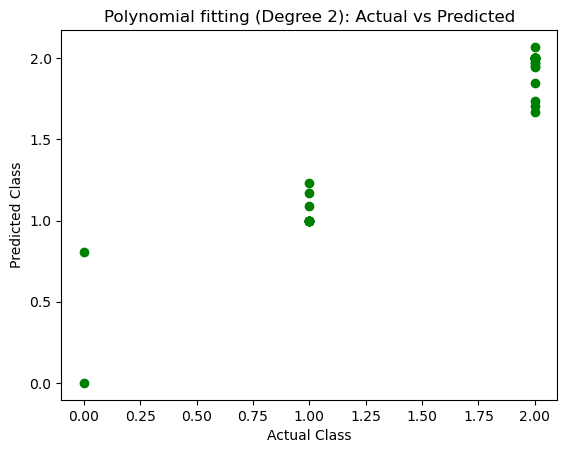

In [40]:
plt.scatter(y_test, NLP_y_test_pred_poly, color="green")
plt.xlabel("Actual Class"), plt.ylabel("Predicted Class"), plt.title(f"Polynomial fitting (Degree {NLP_best_degree}): Actual vs Predicted")
plt.show()

In [41]:
Error_data= {
"Model": ["Unprocessed Mse","Processed Mse","Unprocessed R Square","Processed R Square"],
"NLP Valid": [0.03163410679709657,0.02953556052982845,0.9693502006980713,0.9825893925171708],
"NLP Test": [0.031094093682270254,0.03436184420300062,0.9428713091541481,0.9122929670621289],
" NO NLP Valid": [0.032258707510473876,0.12077210652574126,0.9092837246612095,0.6603709040333485],
" NO NLP Test": [0.032258707510473876,0.12077210652574126,0.9092837246612095,0.6603709040333485]
}
df6 = pd.DataFrame(Error_data)
df6.to_csv('Team11_PolynomialErrors.csv', index=False)
print(df6)

                  Model  NLP Valid  NLP Test   Polynomial Valid  \
0       Unprocessed Mse   0.031634  0.031094           0.032259   
1         Processed Mse   0.029536  0.034362           0.120772   
2  Unprocessed R-Square   0.969350  0.942871           0.909284   
3    Processed R-Square   0.982589  0.912293           0.660371   

    Polynomial Test  
0          0.032259  
1          0.120772  
2          0.909284  
3          0.660371  


In [42]:
df6

,Model,NLP Valid,NLP Test,Polynomial Valid,Polynomial Test
0,Unprocessed Mse,0.031634,0.031094,0.032259,0.032259
1,Processed Mse,0.029536,0.034362,0.120772,0.120772
2,Unprocessed R-Square,0.969350,0.942871,0.909284,0.909284
3,Processed R-Square,0.982589,0.912293,0.660371,0.660371
